# Problemas de Instrumentación Nuclear

In [1]:
# Gráficas Estandarizadas
import numpy as np
import matplotlib.pyplot as plt
import random as rn

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 14

# Testing
if False:
  plt.plot([1,2,3], [1,2,3], label = "this is a long text")
  plt.title("test")
  plt.legend()

## 1. Distribución Uniforme

*   Se calcula teóricamente los parámetros de la distribución uniforme (σ, μ)
*   Se calcula el 68% alrededor de la media μ como 34% de cada lado y se señalan los rangos como fue pedido.
*   Se agrandan las fuentes, se pide se haga lo mismo



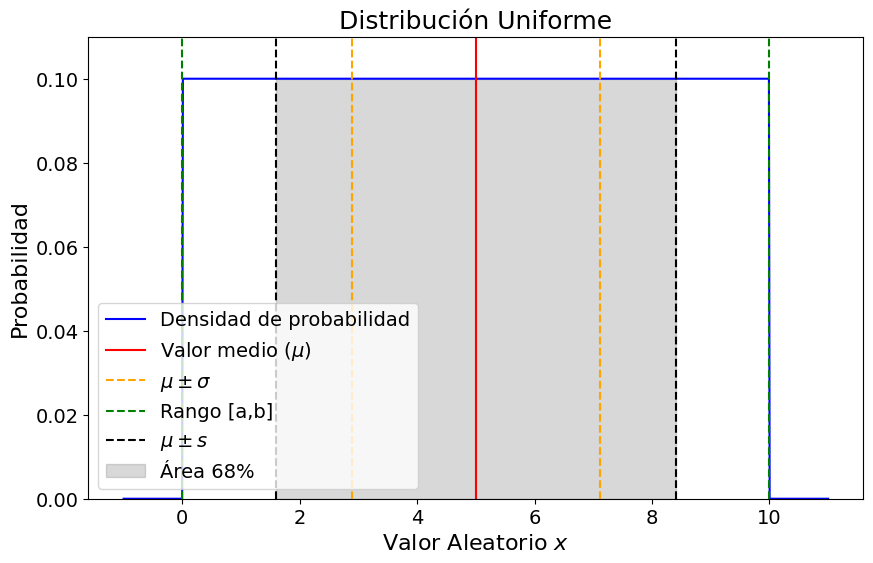

In [2]:
# Definimos los límites
a = 0  # Límite inferior
b = 10  # Límite superior
mu = (a + b) / 2  # Valor medio
sigma = (b - a) / np.sqrt(12)  # Desviación estándar

# Función de densidad de probabilidad
def uniform_pdf(x, a, b):
    return 1 / (b - a) if a <= x <= b else 0

# Rango de valores x
x = np.linspace(a - 1, b + 1, 1000)
y = [uniform_pdf(val, a, b) for val in x]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Densidad de probabilidad", color="blue")
plt.axvline(mu, color="red", linestyle="-", label="Valor medio ($\mu$)")
plt.axvline(a + sigma, color="orange", linestyle="--", label="$\mu \pm \sigma$")
plt.axvline(b - sigma, color="orange", linestyle="--")

plt.axvline(a, color="green", linestyle="--", label="Rango [a,b]")
plt.axvline(b, color="green", linestyle="--")

plt.axvline(mu + 1.18*sigma, color="black", linestyle="--", label="$\mu \pm s$")
plt.axvline(mu - 1.18*sigma, color="black", linestyle="--")

# Rellenar el área del 68%, con 34% mas o menos
x_fill = np.linspace(mu - 3.4, mu + 3.4, 100)
y_fill = [uniform_pdf(val, a, b) for val in x_fill]
plt.fill_between(x_fill, y_fill, color="gray", alpha=0.3, label="Área 68%")

# Personalizar el gráfico
plt.title("Distribución Uniforme", fontsize = 18)
plt.xlabel("Valor Aleatorio $x$", fontsize = 16)
plt.ylabel("Probabilidad", fontsize = 16)
plt.ylim(0, max(y) * 1.1)
plt.legend(loc = 'lower left')
plt.show()

## 2. Dados

Según el texto se puede ir por 2 caminos para cada ejercicio: **experimental**, programar una simulación y probar resultados; y **teórico**, para verificar estos resultados.

Se describe lo modificado y utilizado

*   Se describe en terminos de parámetros explicitos que luego se aclaran en el informe
*   Se modifica el pdf para hacer que coincida con el mismo del profesor.
*   Explicar por qué la asimetría es `x * std_dev`



### Teórico para Dado Cúbico

Media (Primer momento): 3.5
Desviación estándar: 1.707825127659933
Asimetría: 0.0


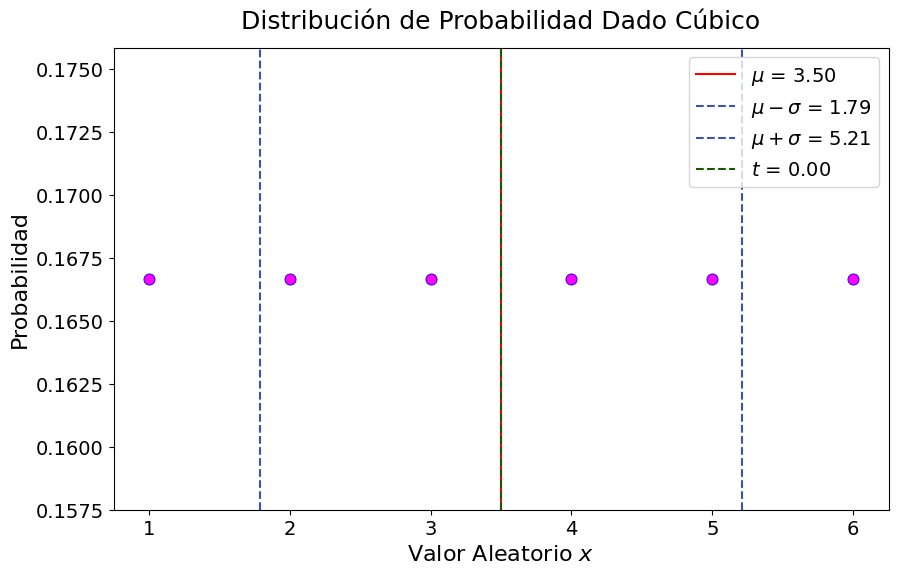

In [3]:
# Definimos los valores del dado y su probabilidad
valores = np.array([1, 2, 3, 4, 5, 6])
probabilidades = np.ones(6) / 6  # Probabilidad uniforme para cada valor

# Primer momento: media (valor esperado)
media = np.sum(valores * probabilidades)

# Segundo momento: varianza y desviación estándar
varianza = np.sum((valores - media)**2 * probabilidades)
desviacion_estandar = np.sqrt(varianza)

# Tercer momento: asimetría
asimetria = np.sum((valores - media)**3 * probabilidades)/ (desviacion_estandar**3)

# Mostrar los resultados
print(f"Media (Primer momento): {media}")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Asimetría: {asimetria}")

# Graficamos la distribución de probabilidad
plt.figure(figsize=(10, 6))
plt.scatter(valores, probabilidades, marker = 'o', color = 'magenta', edgecolors = 'blue', linewidths = 0.6, s = 8**2)
#plt.bar(valores, probabilidades, color='skyblue', edgecolor='black', alpha=0.7, label="Distribución de probabilidad")

# Media
plt.axvline(media, color='red', linestyle='-', label=f'$\mu$ = {media:.2f}')

# Marcamos el radio de la desviación estándar
plt.axvline(media - desviacion_estandar, color='#3953b2', linestyle='--', label=f'$\mu - \sigma$ = {media - desviacion_estandar:.2f}')
plt.axvline(media + desviacion_estandar, color='#3953b2', linestyle='--', label=f'$\mu + \sigma$ = {media + desviacion_estandar:.2f}')

# Graficar la asimetría como una línea vertical
plt.axvline(media + asimetria * desviacion_estandar, color='#165700', linestyle='--', label=f'$t$ = {asimetria:.2f}')

# Título y etiquetas
plt.title("Distribución de Probabilidad Dado Cúbico", pad = 14, fontsize = 18)
plt.xlabel("Valor Aleatorio $x$", fontsize = 16)
plt.ylabel("Probabilidad", fontsize = 16)
plt.legend()


### Teórico para dado piramidal


Media (Primer momento): 3.2499999999999996
Desviación estándar: 1.689427911059441
Asimetría: 0.33052263250094743


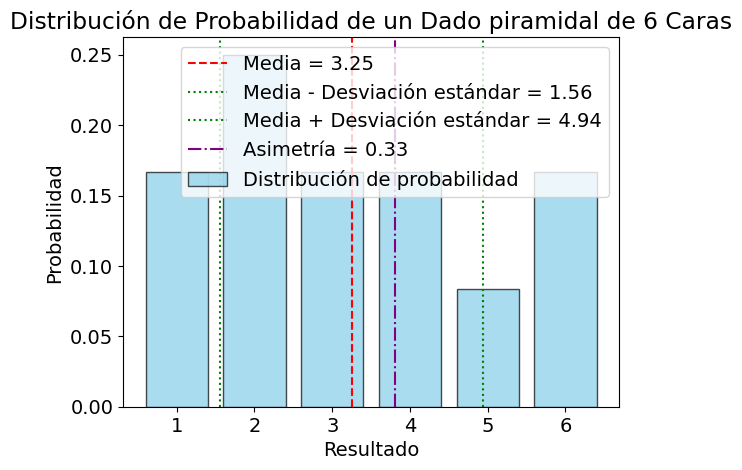

In [4]:
# Definimos los valores del dado y su probabilidad
valores = np.array([1, 2, 3, 4, 5, 6])
probabilidades = np.ones(6) / 6  # Probabilidad uniforme para cada valor
probabilidades[1] += 1/12
probabilidades[4] -=  1/12

# Primer momento: media (valor esperado)
media = np.sum(valores * probabilidades)

# Segundo momento: varianza y desviación estándar
varianza = np.sum((valores - media)**2 * probabilidades)
desviacion_estandar = np.sqrt(varianza)

# Tercer momento: asimetría
asimetria = np.sum((valores - media)**3 * probabilidades) / (desviacion_estandar**3)

# Mostrar los resultados
print(f"Media (Primer momento): {media}")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Asimetría: {asimetria}")

# Graficamos la distribución de probabilidad
plt.bar(valores, probabilidades, color='skyblue', edgecolor='black', alpha=0.7, label="Distribución de probabilidad")

# Marcamos la media
plt.axvline(media, color='red', linestyle='--', label=f'Media = {media:.2f}')

# Marcamos el radio de la desviación estándar
plt.axvline(media - desviacion_estandar, color='green', linestyle=':', label=f'Media - Desviación estándar = {media - desviacion_estandar:.2f}')
plt.axvline(media + desviacion_estandar, color='green', linestyle=':', label=f'Media + Desviación estándar = {media + desviacion_estandar:.2f}')

# Graficar la asimetría como una línea vertical
plt.axvline(media + asimetria * desviacion_estandar, color='purple', linestyle='-.', label=f'Asimetría = {asimetria:.2f}')

# Título y etiquetas
plt.title("Distribución de Probabilidad de un Dado piramidal de 6 Caras")
plt.xlabel("Resultado")
plt.ylabel("Probabilidad")
plt.legend()

# Mostrar la gráfica
plt.show()


### Teorico piramidal como propuesta

Media (Primer momento): 3.2499999999999996
Desviación estándar: 1.689427911059441
Asimetría: 0.33052263250094743


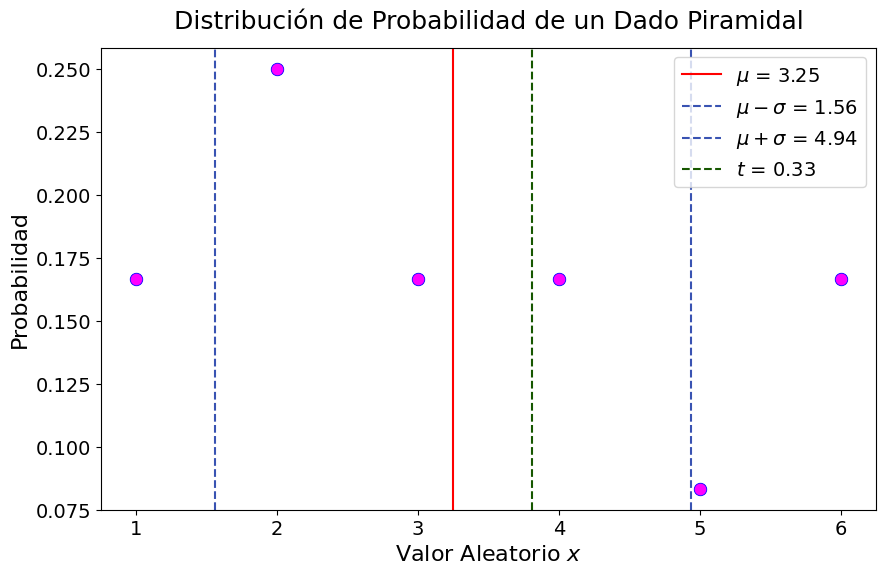

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los valores del dado y su probabilidad
valores = np.array([1, 2, 3, 4, 5, 6])
probabilidades = np.ones(6) / 6  # Probabilidad uniforme para cada valor
probabilidades[1] += 1 / 12
probabilidades[4] -= 1 / 12

# Primer momento: media (valor esperado)
media = np.sum(valores * probabilidades)

# Segundo momento: varianza y desviación estándar
varianza = np.sum((valores - media)**2 * probabilidades)
desviacion_estandar = np.sqrt(varianza)

# Tercer momento: asimetría
asimetria = np.sum((valores - media)**3 * probabilidades) / (desviacion_estandar**3)

# Mostrar los resultados
print(f"Media (Primer momento): {media}")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Asimetría: {asimetria}")

# Graficamos la distribución de probabilidad
plt.figure(figsize=(10, 6))
plt.scatter(valores, probabilidades, marker='o', color='magenta', edgecolors='blue', linewidths=0.6, s=9**2)

# Media
plt.axvline(media, color='red', linestyle='-', label=f'$\\mu$ = {media:.2f}')

# Marcamos el radio de la desviación estándar
plt.axvline(media - desviacion_estandar, color='#3953b2', linestyle='--', label=f'$\\mu - \\sigma$ = {media - desviacion_estandar:.2f}')
plt.axvline(media + desviacion_estandar, color='#3953b2', linestyle='--', label=f'$\\mu + \\sigma$ = {media + desviacion_estandar:.2f}')

# Graficar la asimetría como una línea vertical
plt.axvline(media + asimetria * desviacion_estandar, color='#165700', linestyle='--', label=f'$t$ = {asimetria:.2f}')

# Título y etiquetas
plt.title("Distribución de Probabilidad de un Dado Piramidal", pad=14, fontsize=18)
plt.xlabel("Valor Aleatorio $x$", fontsize=16)
plt.ylabel("Probabilidad", fontsize=16)
plt.legend()

# Mostrar la gráfica
plt.show()


## 3. Histograma

Propondría cambiar "media" por el simbolo y en el caption colocar la expliación de cada símbolo

Valor medio: 7501.80 mV
Desviación estándar: 26.74 mV


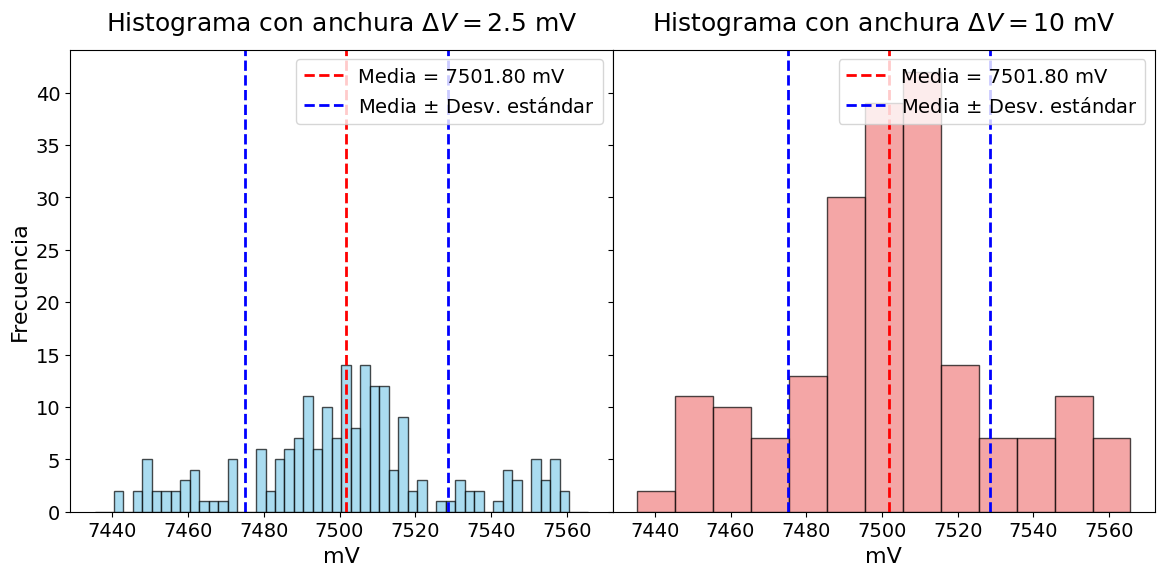

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#Punto 3
# Conjunto de datos
datos = np.array([
    7521.2, 7556.1, 7478.0, 7495.1, 7487.3, 7488.2, 7508.6, 7510.6, 7488.1, 7537.9,
    7452.8, 7502.0, 7487.7, 7490.2, 7515.8, 7514.9, 7501.4, 7551.5, 7502.7, 7501.8,
    7492.2, 7512.9, 7494.7, 7533.0, 7501.3, 7522.4, 7480.9, 7442.3, 7530.9, 7535.3,
    7545.7, 7503.8, 7511.2, 7509.1, 7517.9, 7545.4, 7516.0, 7495.8, 7496.9, 7505.9,
    7507.1, 7441.3, 7478.9, 7491.3, 7506.7, 7493.8, 7510.7, 7485.0, 7481.0, 7544.0,
    7559.7, 7491.6, 7503.0, 7496.1, 7460.5, 7558.1, 7508.5, 7470.3, 7500.8, 7449.0,
    7511.5, 7495.1, 7504.3, 7513.1, 7499.9, 7511.6, 7486.0, 7502.7, 7490.2, 7459.4,
    7551.9, 7502.3, 7485.4, 7452.3, 7459.1, 7553.6, 7495.6, 7508.6, 7500.8, 7551.3,
    7502.1, 7506.9, 7510.6, 7557.2, 7512.8, 7484.9, 7506.3, 7490.7, 7500.5, 7501.4,
    7461.8, 7514.7, 7456.0, 7491.0, 7462.5, 7508.9, 7480.2, 7488.5, 7506.8, 7515.9,
    7457.8, 7498.6, 7478.0, 7506.6, 7448.3, 7536.0, 7508.2, 7510.5, 7496.0, 7446.8,
    7489.9, 7461.9, 7498.4, 7497.7, 7528.4, 7495.9, 7511.6, 7500.6, 7507.1, 7464.2,
    7494.0, 7455.4, 7480.4, 7470.9, 7499.7, 7447.1, 7497.7, 7503.3, 7504.1, 7517.7,
    7515.7, 7508.4, 7518.7, 7558.6, 7509.3, 7516.8, 7487.6, 7506.4, 7505.1, 7509.0,
    7493.3, 7510.5, 7499.6, 7505.5, 7496.2, 7505.0, 7514.4, 7507.5, 7554.4, 7552.2,
    7472.6, 7532.6, 7557.1, 7490.8, 7458.7, 7491.9, 7516.0, 7547.7, 7510.6, 7558.0,
    7491.0, 7488.2, 7449.5, 7521.4, 7472.4, 7510.8, 7466.0, 7527.0, 7491.1, 7546.2,
    7507.6, 7519.2, 7507.1, 7534.4, 7487.1, 7492.2, 7542.2, 7449.2, 7498.6, 7470.8,
    7550.7, 7510.7, 7506.7, 7499.6, 7479.7, 7509.1, 7507.2, 7470.7, 7545.4, 7504.8,
    7483.4, 7497.9, 7483.6, 7450.1, 7517.2, 7490.7, 7544.2, 7487.1, 7455.1, 7553.8
])

# Cálculo del valor medio y desviación estándar
valor_medio = np.mean(datos)
desviacion_estandar = np.std(datos)

# Imprimir los valores
print(f"Valor medio: {valor_medio:.2f} mV")
print(f"Desviación estándar: {desviacion_estandar:.2f} mV")

# Rango de voltajes (mínimo y máximo con un 5% de margen)
v_min = min(datos)
v_max = max(datos)
margen = 0.05 * (v_max - v_min)
rango_min = v_min - margen
rango_max = v_max + margen

# Configuración del histograma con delta de 2.5 y 10
delta1 = 2.5
delta2 = 10
num_bins1 = int((rango_max - rango_min) / delta1)
num_bins2 = int((rango_max - rango_min) / delta2)

# Crear figuras para los dos histogramas
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
plt.subplots_adjust(wspace=0)

# Histograma con delta = 2.5
axs[0].hist(datos, bins=num_bins1, range=(rango_min, rango_max), density=False, alpha=0.7, color='skyblue', edgecolor='black')
axs[0].axvline(valor_medio, color='red', linestyle='--', lw = 2, label=f'Media = {valor_medio:.2f} mV')
axs[0].axvline(valor_medio - desviacion_estandar, color='blue', linestyle='--', lw = 2, label=f'Media $\pm$ Desv. estándar')
axs[0].axvline(valor_medio + desviacion_estandar, color='blue', linestyle='--', lw = 2)
axs[0].set_title("Histograma con anchura $\Delta V = 2.5$ mV", pad = 14, fontsize = 18)
axs[0].set_xlabel("mV", fontsize=16)
axs[0].set_ylabel("Frecuencia", fontsize=16)
axs[0].legend()

# Histograma con delta = 10
axs[1].hist(datos, bins=num_bins2, range=(rango_min, rango_max), density=False, alpha=0.7, color='lightcoral', edgecolor='black')
axs[1].axvline(valor_medio, color='red', linestyle='--', lw = 2, label=f'Media = {valor_medio:.2f} mV')
axs[1].axvline(valor_medio - desviacion_estandar, color='blue', linestyle='--', lw = 2, label=f'Media $\pm$ Desv. estándar')
axs[1].axvline(valor_medio + desviacion_estandar, color='blue', linestyle='--', lw = 2)
axs[1].set_title("Histograma con anchura $\Delta V = 10$ mV", pad = 14, fontsize = 18)
axs[1].set_xlabel("mV", fontsize=16)
axs[1].legend()

#plt.suptitle("Comparación de histogramas con diferentes deltas")
plt.show()


Media sin agrupar: 7501.80 mV
Desviación estándar sin agrupar: 26.74 mV
Media con delta = 2.5: 7501.84 mV
Desviación estándar con delta = 2.5: 26.78 mV
Media con delta = 10: 7502.10 mV
Desviación estándar con delta = 10: 26.95 mV


<function matplotlib.pyplot.suptitle(t: 'str', **kwargs) -> 'Text'>

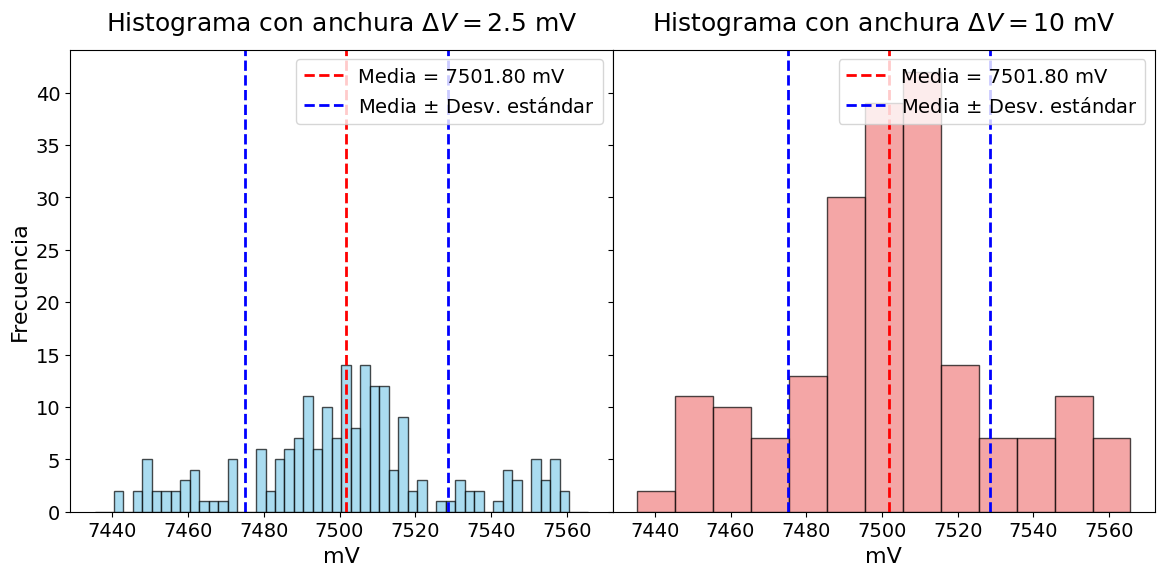

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de datos
datos = np.array([
    7521.2, 7556.1, 7478.0, 7495.1, 7487.3, 7488.2, 7508.6, 7510.6, 7488.1, 7537.9,
    7452.8, 7502.0, 7487.7, 7490.2, 7515.8, 7514.9, 7501.4, 7551.5, 7502.7, 7501.8,
    7492.2, 7512.9, 7494.7, 7533.0, 7501.3, 7522.4, 7480.9, 7442.3, 7530.9, 7535.3,
    7545.7, 7503.8, 7511.2, 7509.1, 7517.9, 7545.4, 7516.0, 7495.8, 7496.9, 7505.9,
    7507.1, 7441.3, 7478.9, 7491.3, 7506.7, 7493.8, 7510.7, 7485.0, 7481.0, 7544.0,
    7559.7, 7491.6, 7503.0, 7496.1, 7460.5, 7558.1, 7508.5, 7470.3, 7500.8, 7449.0,
    7511.5, 7495.1, 7504.3, 7513.1, 7499.9, 7511.6, 7486.0, 7502.7, 7490.2, 7459.4,
    7551.9, 7502.3, 7485.4, 7452.3, 7459.1, 7553.6, 7495.6, 7508.6, 7500.8, 7551.3,
    7502.1, 7506.9, 7510.6, 7557.2, 7512.8, 7484.9, 7506.3, 7490.7, 7500.5, 7501.4,
    7461.8, 7514.7, 7456.0, 7491.0, 7462.5, 7508.9, 7480.2, 7488.5, 7506.8, 7515.9,
    7457.8, 7498.6, 7478.0, 7506.6, 7448.3, 7536.0, 7508.2, 7510.5, 7496.0, 7446.8,
    7489.9, 7461.9, 7498.4, 7497.7, 7528.4, 7495.9, 7511.6, 7500.6, 7507.1, 7464.2,
    7494.0, 7455.4, 7480.4, 7470.9, 7499.7, 7447.1, 7497.7, 7503.3, 7504.1, 7517.7,
    7515.7, 7508.4, 7518.7, 7558.6, 7509.3, 7516.8, 7487.6, 7506.4, 7505.1, 7509.0,
    7493.3, 7510.5, 7499.6, 7505.5, 7496.2, 7505.0, 7514.4, 7507.5, 7554.4, 7552.2,
    7472.6, 7532.6, 7557.1, 7490.8, 7458.7, 7491.9, 7516.0, 7547.7, 7510.6, 7558.0,
    7491.0, 7488.2, 7449.5, 7521.4, 7472.4, 7510.8, 7466.0, 7527.0, 7491.1, 7546.2,
    7507.6, 7519.2, 7507.1, 7534.4, 7487.1, 7492.2, 7542.2, 7449.2, 7498.6, 7470.8,
    7550.7, 7510.7, 7506.7, 7499.6, 7479.7, 7509.1, 7507.2, 7470.7, 7545.4, 7504.8,
    7483.4, 7497.9, 7483.6, 7450.1, 7517.2, 7490.7, 7544.2, 7487.1, 7455.1, 7553.8
])



# Rango de voltajes (mínimo y máximo con un 5% de margen)
v_min = min(datos)
v_max = max(datos)
margen = 0.05 * (v_max - v_min)
rango_min = v_min - margen
rango_max = v_max + margen

# Cálculo del valor medio y desviación estándar no agrupados
def calc_media_std(datos):
    valor_medio = np.mean(datos)
    desviacion_estandar = np.std(datos)
    return(valor_medio,desviacion_estandar)

# Cálculo media y desviación estándar agrupados
def calc_media_std_por_barras(hist, bin_edges):
    # Puntos medios de los bins
    bin_mids = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    # Media ponderada
    media = np.sum(hist * bin_mids) / np.sum(hist)
    # Desviación estándar ponderada
    varianza = np.sum(hist * (bin_mids - media) ** 2) / np.sum(hist)
    desviacion_std = np.sqrt(varianza)
    return media, desviacion_std


# Medidas sin agrupar
media, std = calc_media_std(datos)
print(f"Media sin agrupar: {media:.2f} mV")
print(f"Desviación estándar sin agrupar: {std:.2f} mV")

# Configuración del histograma con delta de 2.5 y 10
delta1 = 2.5
delta2 = 10
num_bins1 = int((rango_max - rango_min) / delta1)
num_bins2 = int((rango_max - rango_min) / delta2)

# Crear figuras para los dos histogramas
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
plt.subplots_adjust(wspace=0)


# Histograma con delta = 2.5
hist1, bin_edges1, _ = axs[0].hist(datos, bins=num_bins1, range=(rango_min, rango_max), density=False, alpha=0.7, color='skyblue', edgecolor='black')
media1, std1 = calc_media_std_por_barras(hist1, bin_edges1)
print(f"Media con delta = 2.5: {media1:.2f} mV")
print(f"Desviación estándar con delta = 2.5: {std1:.2f} mV")
axs[0].axvline(media, color='red', linestyle='--', lw = 2, label=f'Media = {media:.2f} mV')
axs[0].axvline(media - std, color='blue', linestyle='--', lw = 2, label=f'Media $\pm$ Desv. estándar')
axs[0].axvline(media + std, color='blue', linestyle='--', lw = 2)
axs[0].set_title("Histograma con anchura $\Delta V = 2.5$ mV", pad = 14, fontsize = 18)
axs[0].set_xlabel("mV", fontsize=16)
axs[0].set_ylabel("Frecuencia", fontsize=16)
axs[0].legend()

# Histograma con delta = 10
hist2, bin_edges2, _ = axs[1].hist(datos, bins=num_bins2, range=(rango_min, rango_max), density=False, alpha=0.7, color='lightcoral', edgecolor='black')
media2, std2 = calc_media_std_por_barras(hist2, bin_edges2)
print(f"Media con delta = 10: {media2:.2f} mV")
print(f"Desviación estándar con delta = 10: {std2:.2f} mV")
axs[1].axvline(media, color='red', linestyle='--', lw = 2, label=f'Media = {media:.2f} mV')
axs[1].axvline(media - std, color='blue', linestyle='--', lw = 2, label=f'Media $\pm$ Desv. estándar')
axs[1].axvline(media + std, color='blue', linestyle='--', lw = 2)
axs[1].set_title("Histograma con anchura $\Delta V = 10$ mV", pad = 14, fontsize = 18)
axs[1].set_xlabel("mV", fontsize=16)
axs[1].legend()


plt.suptitle


## 4.

i    d (cuentas)    σ (cuentas)
1   147            12.12
2   152            12.33
3   153            12.37
4   171            13.08
5   146            12.08
6   168            12.96
7   145            12.04
8   133            11.53
9   168            12.96
10  171            13.08


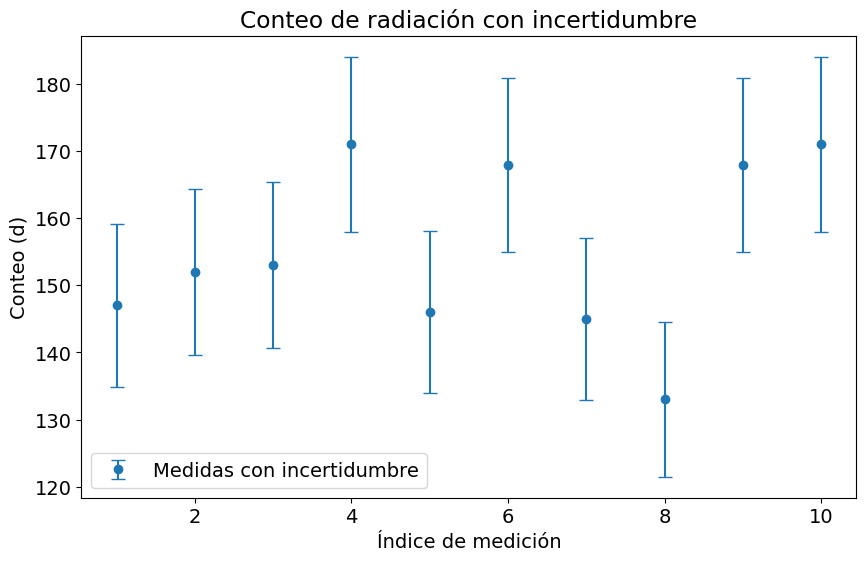

Valor promedio (μ): 155.40 cuentas


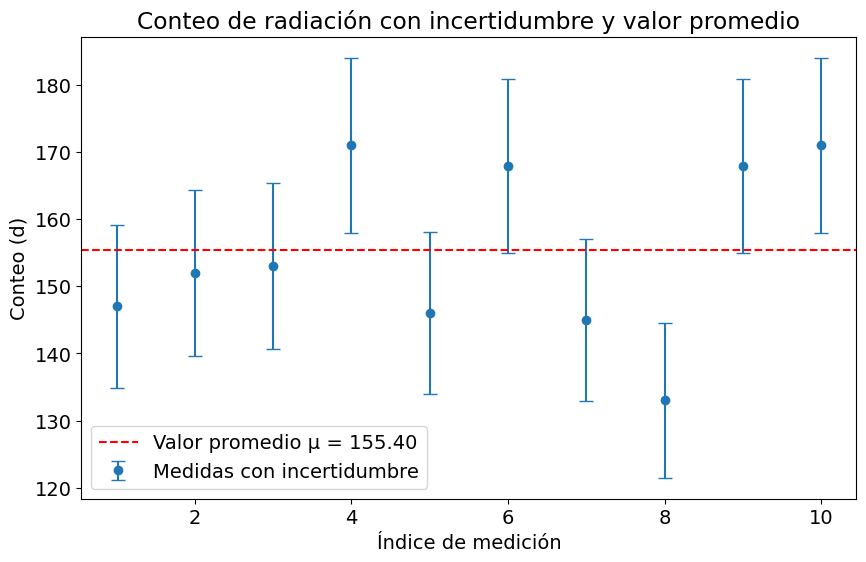

Incertidumbre (σ) usando el promedio: 13.29 cuentas
Incertidumbre propagada (σ): 12.47 cuentas


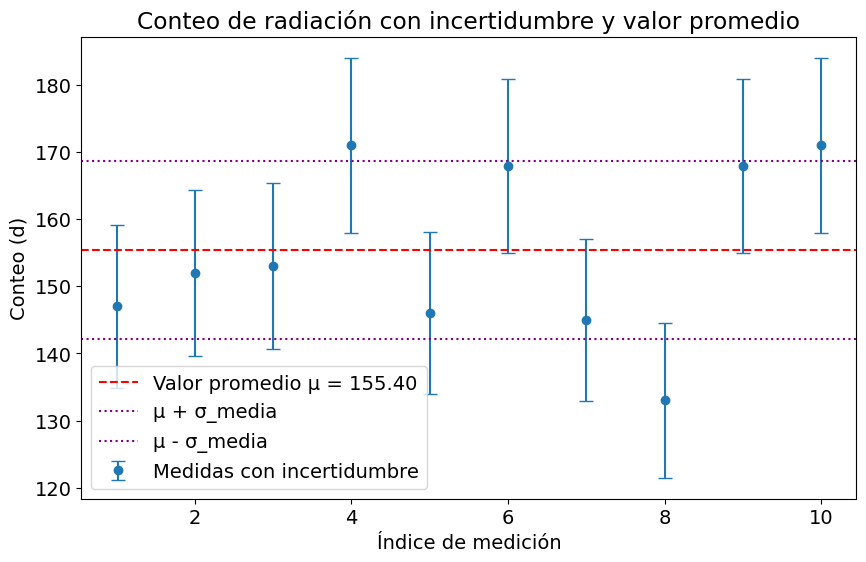

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#Punto 4
# Datos de conteo
d = np.array([147, 152, 153, 171, 146, 168, 145, 133, 168, 171])

# Calcular incertidumbre para cada medida
sigma = np.sqrt(d)
# Redondear a dos decimales
sigma = np.round(sigma, 2)

# Imprimir la tabla
print("i    d (cuentas)    σ (cuentas)")
for i, (conteo, inc) in enumerate(zip(d, sigma), 1):
    print(f"{i:<4}{conteo:<15}{inc}")

# Crear la gráfica
x = np.arange(1, len(d) + 1)

plt.figure(figsize=(10, 6))
plt.errorbar(x, d, yerr=sigma, fmt='o', capsize=5, label='Medidas con incertidumbre')
plt.xlabel("Índice de medición")
plt.ylabel("Conteo (d)")
plt.title("Conteo de radiación con incertidumbre")

plt.legend()
plt.show()

# Calcular el valor promedio
mu = np.mean(d)

# Imprimir el valor promedio
print(f"Valor promedio (μ): {mu:.2f} cuentas")

# Agregar la línea del valor promedio a la gráfica
plt.figure(figsize=(10, 6))
plt.errorbar(x, d, yerr=sigma, fmt='o', capsize=5, label='Medidas con incertidumbre')
plt.axhline(mu, color='red', linestyle='--', label=f'Valor promedio μ = {mu:.2f}')
plt.xlabel("Índice de medición")
plt.ylabel("Conteo (d)")
plt.title("Conteo de radiación con incertidumbre y valor promedio")
plt.legend()
plt.show()


# Calcular la desviación estándar de la muestra
sigma_media = np.std(d, ddof=1)

# Imprimir el valor de la incertidumbre
print(f"Incertidumbre (σ) usando el promedio: {sigma_media:.2f} cuentas")

# Calcular la incertidumbre propagada
sigma_propagada = np.sqrt(np.sum(sigma**2) / len(d))

# Imprimir el valor de la incertidumbre propagada
print(f"Incertidumbre propagada (σ): {sigma_propagada:.2f} cuentas")

# Graficar con líneas de incertidumbre del valor medio
plt.figure(figsize=(10, 6))
plt.errorbar(x, d, yerr=sigma, fmt='o', capsize=5, label='Medidas con incertidumbre')
plt.axhline(mu, color='red', linestyle='--', label=f'Valor promedio μ = {mu:.2f}')
plt.axhline(mu + sigma_media, color='purple', linestyle=':', label=f'μ + σ_media')
plt.axhline(mu - sigma_media, color='purple', linestyle=':', label=f'μ - σ_media')
plt.xlabel("Índice de medición")
plt.ylabel("Conteo (d)")
plt.title("Conteo de radiación con incertidumbre y valor promedio")
plt.legend()
plt.show()



## 5.

Caso A: a0 = -11.89 cm, a1 = 2.32 cm/s
Caso B: a0 = -3.30 cm, a1 = 1.00 cm/s
Caso A: χ² = 8.84
Caso B: χ² = 3.10
Caso C: a0 = -4.37 cm, a1 = 1.25 cm/s, χ² = 2.08
Caso D: a0 = -11.45 cm, a1 = 2.26 cm/s, χ² = 0.12


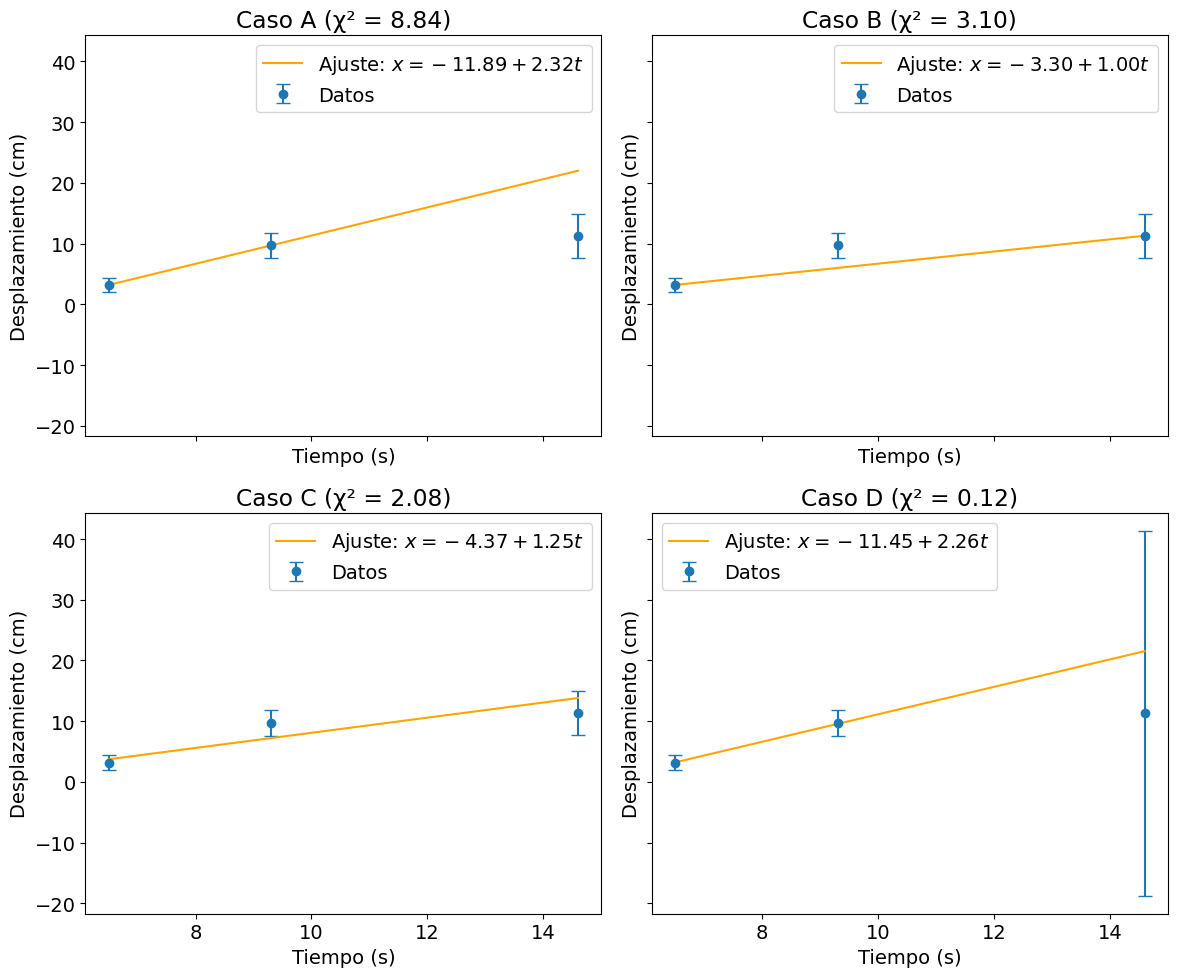

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#Punto 5
# Datos experimentales
t = np.array([6.5, 9.3, 14.6])  # tiempo en segundos
x = np.array([3.2, 9.7, 11.3])  # desplazamiento en cm
sigma_x = np.array([1.2, 2.1, 3.6])  # incertidumbre en x en cm

# Datos para el caso A
t_A = t[:2]
x_A = x[:2]

# Cálculo de a1 y a0
a1_A = (x_A[1] - x_A[0]) / (t_A[1] - t_A[0])
a0_A = x_A[0] - a1_A * t_A[0]

print(f"Caso A: a0 = {a0_A:.2f} cm, a1 = {a1_A:.2f} cm/s")

# Datos para el caso B
t_B = [t[0], t[2]]
x_B = [x[0], x[2]]

# Cálculo de a1 y a0
a1_B = (x_B[1] - x_B[0]) / (t_B[1] - t_B[0])
a0_B = x_B[0] - a1_B * t_B[0]

print(f"Caso B: a0 = {a0_B:.2f} cm, a1 = {a1_B:.2f} cm/s")


# Calcular χ² para el caso A
chi2_A = np.sum(((x - (a0_A + a1_A * t))**2) / sigma_x**2)
print(f"Caso A: χ² = {chi2_A:.2f}")

# Calcular χ² para el caso B
chi2_B = np.sum(((x - (a0_B + a1_B * t))**2) / sigma_x**2)
print(f"Caso B: χ² = {chi2_B:.2f}")


# Ajuste por mínimos cuadrados ponderado (Caso C)
coef_C, cov_C = np.polyfit(t, x, 1, w=1/sigma_x, cov=True)
a1_C, a0_C = coef_C

# Cálculo de χ² para el caso C
chi2_C = np.sum(((x - (a0_C + a1_C * t))**2) / sigma_x**2)
print(f"Caso C: a0 = {a0_C:.2f} cm, a1 = {a1_C:.2f} cm/s, χ² = {chi2_C:.2f}")


# Nueva incertidumbre en el último punto
sigma_x_D = sigma_x.copy()
sigma_x_D[2] = 30.0

# Ajuste de mínimos cuadrados ponderado (Caso D)
coef_D, cov_D = np.polyfit(t, x, 1, w=1/sigma_x_D, cov=True)
a1_D, a0_D = coef_D

# Cálculo de χ² para el caso D
chi2_D = np.sum(((x - (a0_D + a1_D * t))**2) / sigma_x_D**2)
print(f"Caso D: a0 = {a0_D:.2f} cm, a1 = {a1_D:.2f} cm/s, χ² = {chi2_D:.2f}")

# Gráfica
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
cases = [(a0_A, a1_A, chi2_A, 'Caso A', axs[0, 0]),
         (a0_B, a1_B, chi2_B, 'Caso B', axs[0, 1]),
         (a0_C, a1_C, chi2_C, 'Caso C', axs[1, 0]),
         (a0_D, a1_D, chi2_D, 'Caso D', axs[1, 1])]

for a0, a1, chi2, title, ax in cases:
    # Graficar datos con barras de error
    ax.errorbar(t, x, yerr=sigma_x_D if title == 'Caso D' else sigma_x, fmt='o', capsize=5, label='Datos')

    # Línea de ajuste
    t_fit = np.linspace(min(t), max(t), 100)
    x_fit = a0 + a1 * t_fit
    ax.plot(t_fit, x_fit, label=f'Ajuste: $x = {a0:.2f} + {a1:.2f}t$', color='orange')

    # Etiquetas y título
    ax.set_title(f"{title} (χ² = {chi2:.2f})")
    ax.set_xlabel("Tiempo (s)")
    ax.set_ylabel("Desplazamiento (cm)")
    ax.legend()

plt.tight_layout()
plt.show()


## 6. Decaimiento Cesio

Algunos datos del ejercicio

- `N`: Población a decaer.

In [10]:
# Definimos los datos conocidos
porcentaje_gamma = 85.1                 # Porcentaje de decaimientos que emiten rayos gamma
porcentaje_CI = 100 - porcentaje_gamma  # Porcentaje de decaimientos que emiten electrones de Conversión Interna
N = 10**3               # Total de decaimientos del experimento

# Cálculo de rayos gamma emitidos y electrones de Conversión Interna (CI)
rayos_gamma = N * (porcentaje_gamma / 100)
electrones_CI = N * (porcentaje_CI / 100)

# Información de la fuente de 137Cs
actividad_microCi = 1e-6                # Actividad en microCi
conversion_Ci_Bq = 3.7e10               # 1 Ci equivale a 3.7e10 Bq

# Cálculo de la actividad total en Bq
actividad_total_Bq = actividad_microCi * conversion_Ci_Bq

# Cálculo de la actividad gamma
actividad_gamma_Bq = actividad_total_Bq * (porcentaje_gamma / 100)
actividad_gamma_Ci = actividad_gamma_Bq / conversion_Ci_Bq


print(f'''
Rayos Gamma = {rayos_gamma}
Rayos Conversional = {electrones_CI}
Actividad Gamma = {actividad_gamma_Bq} Bq
Actividad Conversional = {actividad_gamma_Ci} Ci
''')




Rayos Gamma = 851.0
Rayos Conversional = 149.00000000000006
Actividad Gamma = 31487.0 Bq
Actividad Conversional = 8.51e-07 Ci



## 7. Flujo capilar

Algunos cálculos del punto 2

In [11]:
# calcular tau
r = 1e-3
L = 1e-1
A = 1e-3
mu = 1e-3
g = -9.8
rho = 997

tau = -(8*A*mu*L)/(np.pi*rho*g*r**4)

print(f"tau: {tau}")

tau: 26.062668510330223


In [12]:
# Calcular semi-vida
T_m = np.log(2)*tau
print(f"Semi-vida: {T_m}")

Semi-vida: 18.065265195803864


In [13]:
tau_3 = 16.21118
r_3 = (-(8*A*mu*L)/(np.pi*rho*g*tau_3))**(1/4)
print(f"r_3: {r_3:e}")

r_3: 1.126033e-03


## 9. Klein Gordon

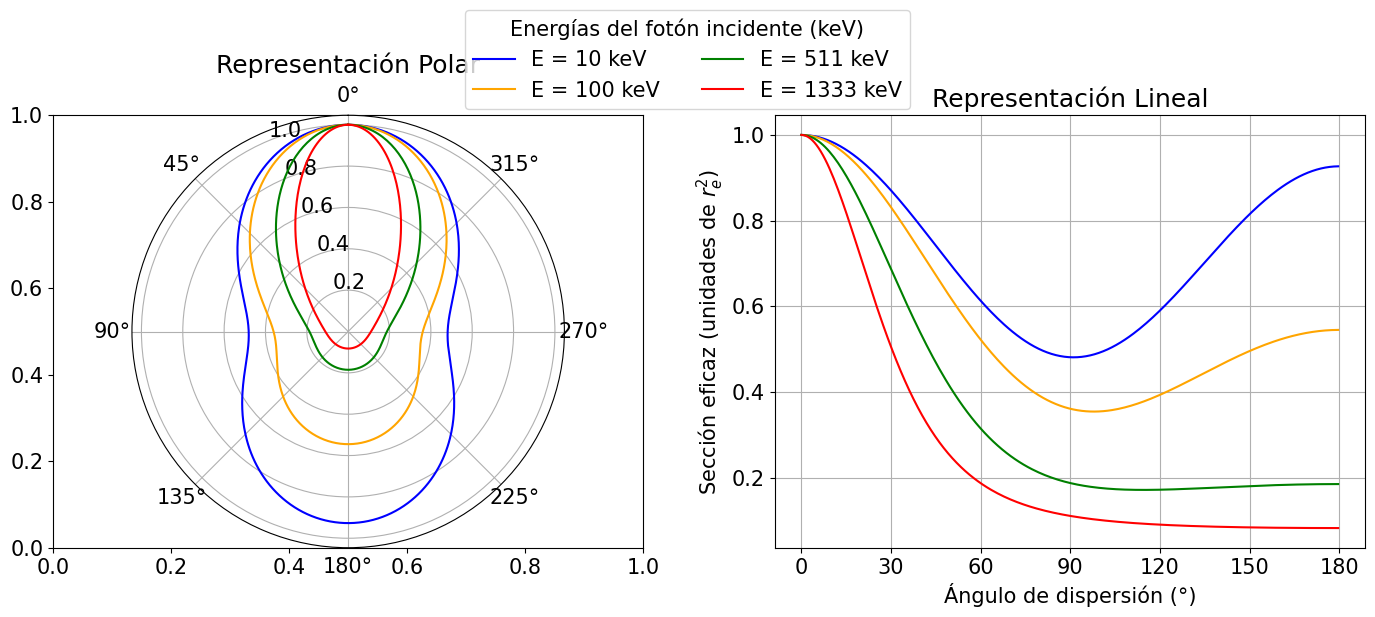

In [14]:
#Punto 9
import numpy as np
import matplotlib.pyplot as plt

# Constantes
m_e_c2 = 511  # Energía de reposo del electrón en keV
r_e2 = 1  # Unidad arbitraria para r_e^2

# Energías del fotón incidente (en keV)
E1 = [10, 100, 511, 1333]

# Función de energía dispersada del fotón
def energy_scattered(E, theta):
    return E / (1 + (E / m_e_c2) * (1 - np.cos(theta)))

# Fórmula de Klein-Nishina
def klein_nishina(E, theta):
    E_prime = energy_scattered(E, theta)
    term1 = (E_prime / E)**2
    term2 = (E_prime / E) + (E / E_prime) - np.sin(theta)**2
    return r_e2 / 2 * term1 * term2

# Ángulos en radianes para 0° a 2pi, pero ajustaremos la gráfica cartesiana a pi
theta = np.linspace(0, 2 * np.pi, 500)

# Aumentar el tamaño de la fuente de todo el gráfico
plt.rcParams.update({'font.size': 15})

# Función para graficar los resultados
def plot_graphs():
    # Crear subgráficos, uno polar y uno cartesiano
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1]})
    polar_ax = plt.subplot(121, projection='polar')  # Graficar polar en el primer subgráfico
    linear_ax = axes[1]  # El segundo subgráfico será lineal

    colors = ["blue", "orange", "green", "red"]

    # Para controlar que solo haya una entrada por energía en la leyenda
    handles_labels = []

    for i, E in enumerate(E1):
        # Cálculo de Klein-Nishina para cada energía
        sigma = klein_nishina(E, theta)

        # Graficar en coordenadas polares, pero SIN LEYENDA
        polar_ax.plot(theta, sigma, color=colors[i], label='_nolegend_')  # No incluir en la leyenda

        # Graficar en coordenadas cartesianas (lineales), solo hasta pi
        line, = linear_ax.plot(np.degrees(theta[:250]), sigma[:250], color=colors[i], label=f"E = {E} keV")
        handles_labels.append((line, f"E = {E} keV"))  # Guardar la curva y su texto de leyenda

    # Configurar la gráfica polar
    polar_ax.set_theta_zero_location('N')
    polar_ax.set_theta_direction(1)  # Sentido antihorario
    polar_ax.set_title("Representación Polar", va='bottom')

    # Configurar la gráfica lineal (cartesiana)
    linear_ax.set_xlabel("Ángulo de dispersión (°)")
    linear_ax.set_ylabel("Sección eficaz (unidades de $r_e^2$)")
    linear_ax.set_title("Representación Lineal")
    linear_ax.set_xticks(np.arange(0, 181, 30))  # Marcas en el eje X de 30 en 30 grados
    linear_ax.grid(True)

    # Crear una única leyenda con las entradas de handles_labels
    handles, labels = zip(*handles_labels)  # Desempaquetar las curvas y sus etiquetas
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, title="Energías del fotón incidente (keV)")

    # Mostrar ambas gráficas
    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_graphs()